## Let's Measure the Dark Energy!
## The Hubble Diagram and Cosmology

The **Hubble diagram** plots the distance modulus of objects (like Type Ia supernovae) against their redshift. The distance modulus ($\mu$) is related to the luminosity distance ($D_L$) by:

$$ \mu(z) = 5 \log_{10}(D_L(z) / \mathrm{Mpc}) + 25 $$

The luminosity distance $D_L(z)$ depends on the expansion history of the universe, which is governed by the cosmological parameters, primarily the matter density ($\Omega_m$), the dark energy density ($\Omega_\Lambda$), and the curvature density ($\Omega_k$).

The relationship between luminosity distance and redshift is derived from the Friedmann equations and the metric of spacetime. A key component is the comoving distance ($\chi(z)$), which is the distance between two points at the same cosmic time in a comoving coordinate system. The line-of-sight comoving distance is given by the integral:

$$ \chi(z) = \int_0^z \frac{dz'}{E(z')} $$

where $E(z)$ describes the evolution of the Hubble parameter with redshift:

$$ E(z) = \frac{H(z)}{H_0} = \sqrt{ \Omega_m(1+z)^3 + \Omega_k(1+z)^2 + \Omega_\Lambda } $$

Here, $H_0$ is the Hubble constant, and the curvature density $\Omega_k$ is related to $\Omega_m$ and $\Omega_\Lambda$ by the constraint from the Friedmann equation: $\Omega_k = 1 - \Omega_m - \Omega_\Lambda$.

The luminosity distance $D_L(z)$ is related to the comoving distance $\chi(z)$ and the transverse comoving distance $D_M(z)$ by $D_L(z) = (1+z) D_M(z)$. The form of $D_M(z)$ depends on the curvature ($\Omega_k$):

*   **Flat Universe ($\Omega_k = 0$, so $\Omega_\Lambda = 1 - \Omega_m$):**
    $$ D_M(z) = (c/H_0) \chi(z) $$
    In a flat universe, the cosmological model for distance is simplified, depending effectively on a single density parameter, for example, $\Omega_m$ (since $\Omega_\Lambda$ is determined by $\Omega_m$).

*   **Open Universe ($\Omega_k > 0$):**
    $$ D_M(z) = (c/H_0) \frac{1}{\sqrt{\Omega_k}} \sinh(\sqrt{\Omega_k} \chi(z)) $$

*   **Closed Universe ($\Omega_k < 0$):**
    $$ D_M(z) = (c/H_0) \frac{1}{\sqrt{|\Omega_k|}} \sin(\sqrt{|\Omega_k|} \chi(z)) $$

And then $D_L$ = (1+z) $D_M$.

By fitting the theoretical distance modulus $\mu(z)$ to the observed Hubble diagram of Type Ia supernovae, we can constrain the values of the cosmological parameters $\Omega_m$ and $\Omega_\Lambda$. The dependence of $D_L$ on these parameters, particularly at higher redshifts, provides a powerful probe of the universe's expansion history and its composition.

We can use these relations and obaservations of distance modulus and redshift ($\mu$, z) to fit for the underlying cosmological parameters.

We'll use data compiled into the Pantheon+ supernova sample, which is shown in the FIgure below. We'll use a binned version of this, to keep the data volumne low.

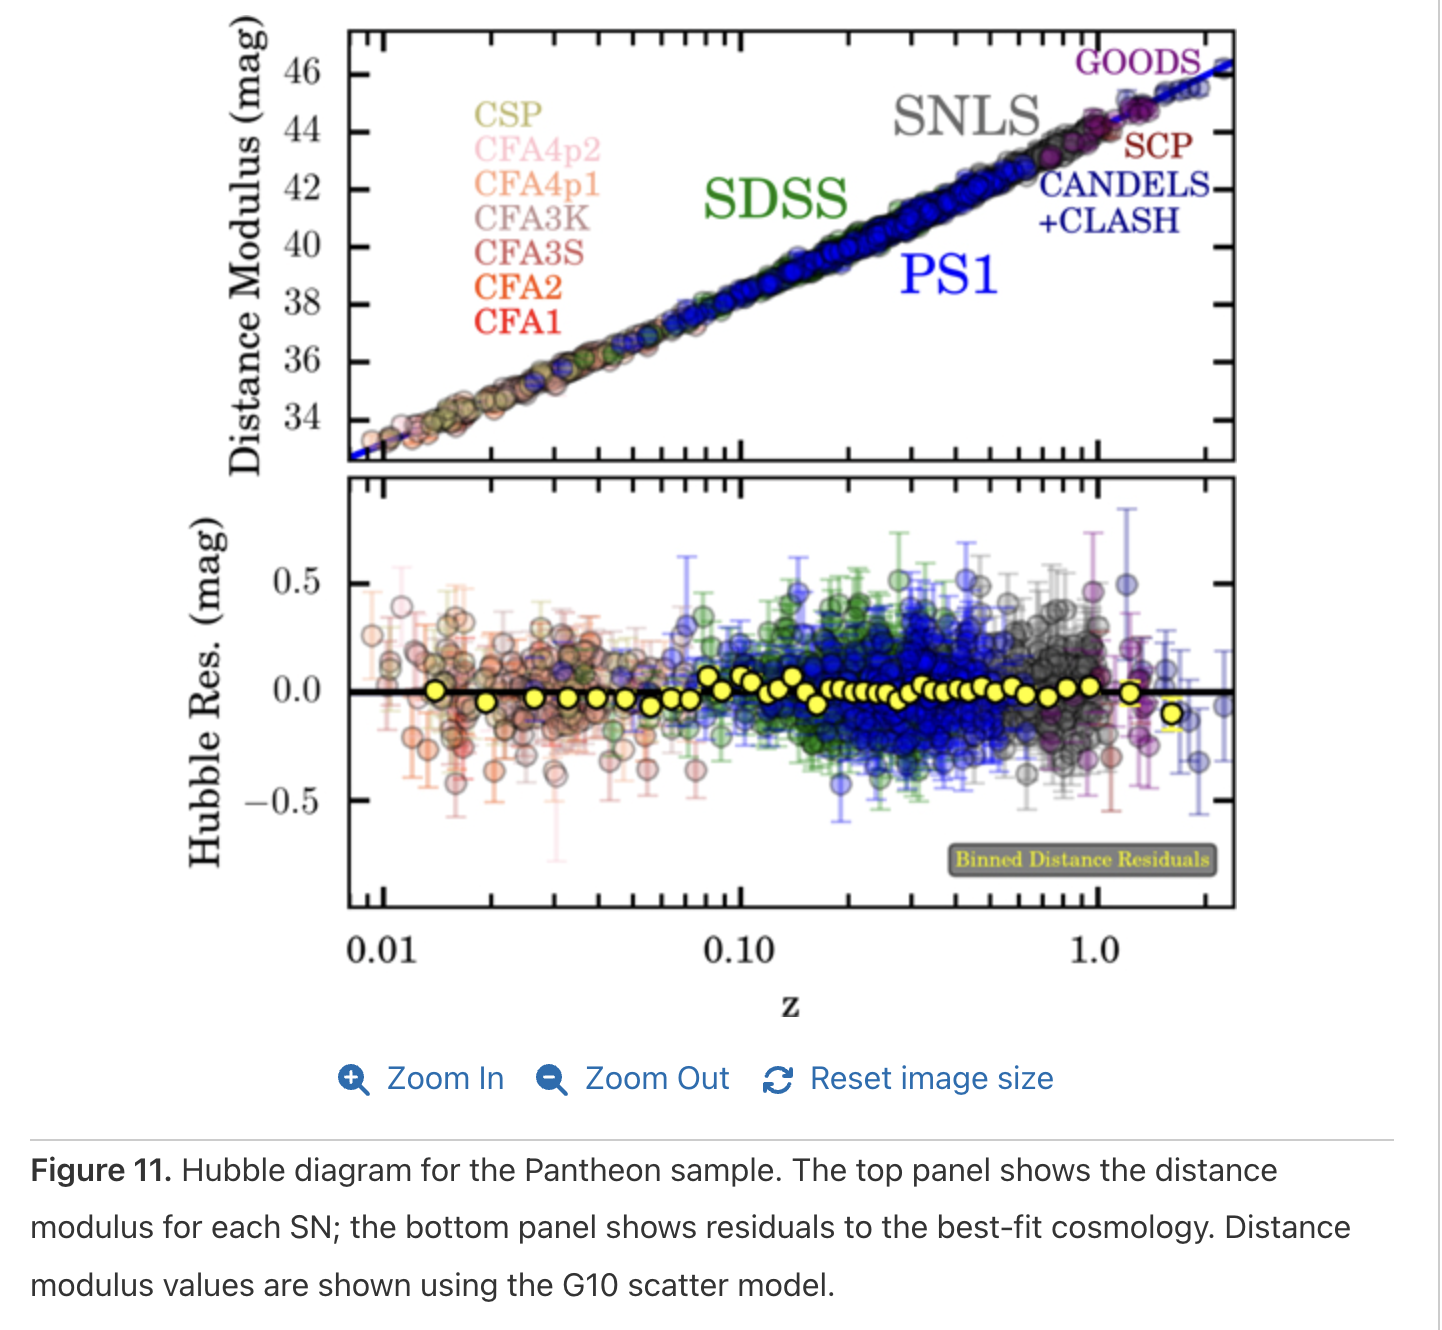

##Data
The cell below contains a 3-column data structure from the Pantheon+ supernova survey. The data are binned by redshift, and the columns are 1) redshift in the CMB reference frame, 2) the observed peak brightness of type Ia supernova in that redshift bin, and 3) the uncertainty in peak brightness.

You can consider the peak brightness as a measurement of apparent magnnitude. We're going to assume the data are corrected for Galactic extinction, for 'K correcitons' that compensate for observed vs. rest frame passband effects, and for SN phenomenology.


In [ ]:

import pandas as pd
from io import StringIO

raw = """zcmb mb dmb
0.014 14.57001926 0.0311
0.0194 15.2279603507 0.02645
0.0264 15.934102317 0.0231
0.0329 16.4217829558 0.0235
0.0396 16.836418956 0.02845
0.0475 17.2346439906 0.0334
0.056 17.5758459622 0.03215
0.064 17.9104543501 0.0439
0.0721 18.1780074589 0.03865
0.0811 18.5543855764 0.04225
0.0889 18.7006554037 0.03635
0.1001 19.0388242428 0.03515
0.1071 19.1720185353 0.03355
0.1195 19.3711295152 0.026
0.1278 19.5555026238 0.02635
0.1396 19.8185930766 0.02335
0.1519 19.9445025196 0.0237
0.1635 20.0642537602 0.02585
0.1778 20.3389008923 0.01965
0.1906 20.5047456137 0.02205
0.2067 20.6854007995 0.0214
0.2216 20.8610322507 0.0233
0.2405 21.0518440051 0.0222
0.2558 21.2037930719 0.02025
0.2762 21.3636137766 0.0221
0.2972 21.5790014334 0.0216
0.3215 21.813277279 0.0214
0.3453 21.9665751024 0.0234
0.3708 22.1428940056 0.02145
0.4049 22.3799192408 0.03225
0.4355 22.5579272526 0.0254
0.4738 22.797376642 0.02935
0.5174 23.0011594448 0.02685
0.5742 23.3004345026 0.0245
0.6299 23.5036280324 0.031
0.724 23.8666293039 0.027
0.821 24.2445519795 0.0248
0.9511 24.6411323707 0.0276
1.2336 25.3039940191 0.05635
1.6123 25.9259729107 0.0735"""
df = pd.read_csv(StringIO(raw), sep=r"\s+")
df.head()


It's always a good idea to plot data, to make sure there aren't any glitches or anomalies. So let's do that.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.errorbar(df["zcmb"], df["mb"], yerr=df["dmb"], fmt='o', ms=3, capsize=2)
plt.xlabel("zcmb (redshift)")
# Use raw string for the label to correctly render LaTeX and avoid SyntaxWarning
plt.ylabel(r"$\mu$ (distance modulus, mag)")

plt.title("Distance modulus vs. redshift")
plt.tight_layout()
plt.show()

**Add a cell below that plots distance modulus vs. log(z)**

In [ ]:
import numpy as np

c_kms = 299792.458  # km/s

def E_z(z, Om, Ol):
    Ok = 1.0 - Om - Ol
    return np.sqrt(Om*(1.0+z)**3 + Ok*(1.0+z)**2 + Ol)

def comoving_chi(z, Om, Ol, nsteps=2000):
    if z == 0:
        return 0.0
    steps = max(2, int(nsteps*max(z, 1.0)/1.6))
    zz = np.linspace(0.0, z, steps)
    integrand = 1.0 / E_z(zz, Om, Ol)
    # Use np.trapezoid instead of np.trapz to avoid DeprecationWarning
    return np.trapezoid(integrand, zz)

def transverse_comoving_distance(z, Om, Ol, H0=70.0):
    Ok = 1.0 - Om - Ol
    chi = comoving_chi(z, Om, Ol)
    dh = c_kms / H0  # Mpc
    if np.isclose(Ok, 0.0):
        return dh * chi
    if Ok > 0:
        sqrtOk = np.sqrt(Ok)
        return dh / sqrtOk * np.sinh(sqrtOk * chi)
    else:
        sqrtOk = np.sqrt(-Ok)
        return dh / sqrtOk * np.sin(sqrtOk * chi)

def luminosity_distance(z, Om, Ol, H0=70.0):
    return (1.0 + z) * transverse_comoving_distance(z, Om, Ol, H0=H0)

def mu_theory(z, Om, Ol, H0=70.0):
    Dl = luminosity_distance(z, Om, Ol, H0=H0)  # Mpc
    return 5.0 * np.log10(np.maximum(Dl, 1e-12)) + 25.0

def best_moffset(mu_obs, mu_model, dmu):
    w = 1.0 / (dmu**2)
    return np.sum(w * (mu_obs - mu_model)) / np.sum(w)

def chi2_and_offset(mu_obs, mu_model, dmu):
    w = 1.0 / (dmu**2)
    M = best_moffset(mu_obs, mu_model, dmu)
    resid = mu_obs - (mu_model + M)
    chi2 = np.sum(w * resid**2)
    return chi2, M

def chi2_reduced(mu_obs, mu_model, dmu, p):
    chi2, M = chi2_and_offset(mu_obs, mu_model, dmu)
    dof = max(len(mu_obs) - p, 1)
    return chi2 / dof, chi2, dof, M

##Discrete-Step scan through parameters.

In the next cell, we'll step through discrete values of Omega_mass and Omega_Lambda, and compute the chi-squared of the fit. Since the Friedmann equation sets Omega_k=1-Omega_m-Omega_Lambda, we need only explore these two parameters.

this means we need to make nested loops, with a structure like
   
    for Omega_lambda starting at 0 and ending at 1, with a certain step size
   
        for Omega_m going from 0 to 1 with a certain step size
   
           compute theory fit curve, and compute chi-squared value
   
        iterate to next Omega_m
   
    iterate to next Omega_Lambda



Once that is done we'll make a contour plot of reduced chi-squared on the grid we just ran through. We can find the discrete value of Omega_m and Omega_Lambda that has the smallest value of chi-squared.  

In [ ]:
# Grid scan for cosmological parameters Omega_m and Omega_Lambda

# This cell performs a grid search over the Omega_m and Omega_Lambda parameter space
# to find the combination that minimizes the chi-squared statistic,
# indicating the best fit to the supernova data.

# Define the grid of Omega_m and Omega_Lambda values to scan
# The grid ranges from 0 to 1 for both parameters with a step of 0.05
Om_grid = np.arange(0.0, 1.0+1e-9, 0.05)
Ol_grid = np.arange(0.0, 1.0+1e-9, 0.05)

# Extract data from the DataFrame
# Z: Redshift values
# MU: Observed distance modulus values
# DMU: Uncertainty in observed distance modulus values
Z = df["zcmb"].to_numpy(dtype=float)
MU = df["mb"].to_numpy(dtype=float)
DMU = df["dmb"].to_numpy(dtype=float)

# Initialize grids to store chi-squared and reduced chi-squared values for each point in the parameter grid
# chi2_grid stores the raw chi-squared values.
# chi2r_grid stores the reduced chi-squared values (chi2 / degrees of freedom).
chi2r_grid = np.zeros((len(Ol_grid), len(Om_grid)))
chi2_grid  = np.zeros((len(Ol_grid), len(Om_grid)))

# Iterate through each combination of Omega_Lambda and Omega_m in the grid
for i, Ol in enumerate(Ol_grid):
    for j, Om in enumerate(Om_grid):
        # Calculate the theoretical distance modulus for each redshift using the current Om and Ol values
        mu_mod = np.array([mu_theory(z, Om, Ol) for z in Z])
        # Calculate the reduced chi-squared and raw chi-squared, along with degrees of freedom and nuisance offset.
        # The nuisance offset (related to H0 and absolute magnitude) is marginalized analytically,
        # effectively fitting for it at each (Om, Ol) point.
        # p=1 for the nuisance parameter, which reduces the degrees of freedom by 1.
        chi2r, chi2, dof, Moff = chi2_reduced(MU, mu_mod, DMU, p=1)
        # Store the calculated chi-squared and reduced chi-squared values in the grids
        chi2r_grid[i, j] = chi2r
        chi2_grid[i, j]  = chi2

# --- Plotting Reduced Chi-squared Contours ---

# The reduced chi-squared (chi2r) is used for plotting goodness of fit.
# A value close to 1 indicates a good fit given the uncertainties.

# Calculate the minimum reduced chi-squared value from the grid
chi2r_min = np.min(chi2r_grid)
# Calculate the minimum raw chi-squared value from the grid
chi2_min = np.min(chi2_grid)

# Calculate the difference in reduced chi-squared from the minimum for each grid point
delta_chi2r = chi2r_grid - chi2r_min
# Define the levels for the reduced chi-squared contours.
# These levels are set relative to the minimum reduced chi-squared to visualize the shape of the minimum.
levels_chi2r = np.array([0, 1, 2, 3, 4]) + chi2r_min


# Create a meshgrid for plotting the contours
OM, OL = np.meshgrid(Om_grid, Ol_grid)

# Set up the figure for the contour plot
plt.figure(figsize=(6,5))
# Create the contour plot using the calculated reduced chi-squared values and levels
cchi = plt.contour(OM, OL, chi2r_grid, levels=levels_chi2r)
# Add labels to the contour lines showing the reduced chi-squared values
plt.clabel(cchi, inline=True, fontsize=8, fmt='%.2f')

# --- Plotting the Flat-Universe Line ---

# Define the range for Omega_m for the flat-universe line (Omega_Lambda = 1 - Omega_m)
om_line = np.linspace(0, 1, 200)
# Calculate the corresponding Omega_Lambda values for a flat universe
ol_line = 1.0 - om_line
# Plot the flat-universe line on the contour plot for reference, using a raw string for the label
plt.plot(om_line, ol_line, color='k', linestyle='--', label=r'Flat Universe ($\Omega_\Lambda = 1 - \Omega_m$)')


# Set the labels for the axes and the title of the plot, using raw strings
plt.xlabel(r"Omega_m")
plt.ylabel(r"Omega_Lambda")
plt.title(r"Reduced $\chi^2$ Contours (Grid Scan) with Flat-Universe Line")
# Add a legend to show the flat-universe line label
plt.legend()
# Adjust layout to prevent labels overlapping
plt.tight_layout()
# Display the plot
plt.show()

# --- Identify and Report Best Grid Point (based on raw chi^2) ---

# The best fit parameters are typically found by minimizing the raw chi-squared.
# Although reduced chi-squared is good for assessing fit quality,
# the minimum of raw chi-squared corresponds to the maximum likelihood.

# Find the index of the minimum raw chi-squared value in the chi2_grid
min_idx = np.unravel_index(np.argmin(chi2_grid), chi2_grid.shape)
# Get the corresponding Omega_Lambda and Omega_m values from the grid at the minimum chi^2
best_Ol_g, best_Om_g = Ol_grid[min_idx[0]], Om_grid[min_idx[1]]

# Print the best grid point parameters and the minimum chi-squared value
# Note: This reports the best fit found *on the grid*, not necessarily the true minimum
# which might be slightly off-grid and found by a continuous minimization method.
# The minimum chi2 printed here is the raw chi2.
print(f"Best grid point fit: Omega_m = {best_Om_g:.4f}, Omega_Lambda = {best_Ol_g:.4f}")
print(f"Minimum raw chi^2 on grid: {chi2_min:.2f}")
print(f"Corresponding reduced chi^2 on grid: {chi2r_grid[min_idx]:.2f}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure the grid scan in cell 8d7ac3ab has been run to have Om_grid, Ol_grid, and chi2r_grid available

# Assuming Om_grid, Ol_grid, and chi2r_grid are available from the previous cell (8d7ac3ab)

# Create a meshgrid for plotting the grid points
OM, OL = np.meshgrid(Om_grid, Ol_grid)

# Flatten the grids for the scatter plot
om_flat = OM.flatten()
ol_flat = OL.flatten()
chi2r_flat = chi2r_grid.flatten()

# Create the scatter plot
plt.figure(figsize=(7, 6))
scatter = plt.scatter(om_flat, ol_flat, c=chi2r_flat, cmap='viridis', s=20) # Use 'viridis' or another suitable colormap

# Add a colorbar to show the mapping of colors to reduced chi-squared values
cbar = plt.colorbar(scatter)
cbar.set_label(r'Reduced $\chi^2$')

# Plot the flat-universe line on top of the scatter points for reference
om_line = np.linspace(0, 1, 200)
ol_line = 1.0 - om_line
plt.plot(om_line, ol_line, color='red', linestyle='--', label=r'Flat Universe ($\Omega_\Lambda = 1 - \Omega_m$)')

# Set labels and title, using raw strings for LaTeX
plt.xlabel(r"$\Omega_m$")
plt.ylabel(r"$\Omega_\Lambda$")
plt.title(r"Reduced $\chi^2$ Grid Points with Flat-Universe Line")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Calculate chi^2 along the flat-universe line

If we know from the CMB data that the curvature term is zero, our attention can be focused along the dashed Flat Universe line.

In [ ]:
# Calculate reduced chi^2 values specifically along the flat-universe line

# This cell calculates and plots the reduced chi-squared for cosmological models
# that are constrained to be spatially flat (Omega_Lambda = 1 - Omega_m).
# While raw chi^2 is typically used for Delta chi^2 uncertainty estimation,
# this plot shows the reduced chi^2 values along the flat line.

# Define a range of Omega_m values to evaluate along the flat line
om_flat_line = np.linspace(0, 1, 200)
ol_flat_line = 1.0 - om_flat_line # Corresponding Omega_Lambda values for a flat universe

# Initialize arrays to store chi-squared and reduced chi-squared values along the flat line
chi2_flat_line = np.zeros_like(om_flat_line)
chi2r_flat_line = np.zeros_like(om_flat_line)

# Calculate chi^2 and reduced chi^2 for each point along the flat line
for i, (Om, Ol) in enumerate(zip(om_flat_line, ol_flat_line)):
    # Calculate the theoretical distance modulus for each redshift using the current Om and Ol values
    mu_mod = np.array([mu_theory(z, Om, Ol) for z in Z])
    # Calculate the reduced chi-squared and raw chi-squared
    # p=1 for the nuisance parameter in the reduced chi^2 calculation
    chi2r, chi2, dof, Moff = chi2_reduced(MU, mu_mod, DMU, p=1)
    # Store the calculated chi-squared and reduced chi-squared values
    chi2_flat_line[i] = chi2
    chi2r_flat_line[i] = chi2r


# Find the minimum reduced chi^2 on the flat-universe line
min_chi2r_flat_line = np.min(chi2r_flat_line)
# Find the Omega_m value that corresponds to the minimum reduced chi^2 on the flat line
best_Om_flat_line_r = om_flat_line[np.argmin(chi2r_flat_line)]
# Calculate the corresponding Omega_Lambda for the best-fit flat universe Omega_m (based on reduced chi^2 minimum)
best_Ol_flat_line_r = 1.0 - best_Om_flat_line_r

# Find the raw chi^2 value at the minimum reduced chi^2 point for reporting
# (The minimum of reduced chi^2 occurs at the same parameter values as the minimum of raw chi^2)
min_chi2_flat_line = np.min(chi2_flat_line)
best_Om_flat_line = om_flat_line[np.argmin(chi2_flat_line)]
best_Ol_flat_line = 1.0 - best_Om_flat_line


# Print the best-fit parameters (based on raw chi^2 minimum), minimum raw chi^2, and corresponding reduced chi^2 for the flat universe case
# Note: The best_Om_flat_line and best_Ol_flat_line from raw chi^2 minimum should be the same
# as best_Om_flat_line_r and best_Ol_flat_line_r from reduced chi^2 minimum.
print(f"Best-fit on flat universe line: Omega_m = {best_Om_flat_line:.4f}, Omega_Lambda = {best_Ol_flat_line:.4f}")
print(f"Minimum raw chi^2 on flat universe line: {min_chi2_flat_line:.2f}")
print(f"Corresponding reduced chi^2 on flat universe line (at raw chi^2 minimum): {chi2r_flat_line[np.argmin(chi2_flat_line)]:.2f}")


# Although plotting reduced chi^2, we can still calculate Delta raw chi^2
# for uncertainty estimation, but these levels are not directly plotted on this reduced chi^2 plot.
delta_chi2_flat_line = chi2_flat_line - min_chi2_flat_line

# Find uncertainties using Delta raw chi^2 = 1.0 for 1-sigma
idx_low = np.where(delta_chi2_flat_line < 1.0)[0]
if len(idx_low) > 0:
    cross_indices = np.where(np.diff(np.sign(delta_chi2_flat_line - 1.0)))[0]
    uncertainty_omegas = om_flat_line[cross_indices]

    if len(uncertainty_omegas) >= 2:
        lower_bound = np.min(uncertainty_omegas)
        upper_bound = np.max(uncertainty_omegas)
        print(f"Approximate 1-sigma uncertainty range for Omega_m (flat, from raw chi^2): [{lower_bound:.4f}, {upper_bound:.4f}]")
    elif len(uncertainty_omegas) == 1:
         print(f"Could not determine symmetric 1-sigma uncertainty range (from raw chi^2). Closest Omega_m to delta_chi2=1 is {uncertainty_omegas[0]:.4f}")
    else:
        print("Could not find 1-sigma uncertainty range on the flat line within the chosen Omega_m range (from raw chi^2).")
else:
     print("Could not find 1-sigma uncertainty range on the flat line within the chosen Omega_m range (from raw chi^2).")


# Plot the reduced chi^2 along the flat line
plt.figure(figsize=(8, 4))
plt.plot(om_flat_line, chi2r_flat_line, label=r'Reduced $\chi^2$ along $\Omega_\Lambda = 1 - \Omega_m$')

# Add annotation for the minimum reduced chi^2 on the plot
plt.annotate(rf'Min Reduced $\chi^2$: {min_chi2r_flat_line:.2f}',
             xy=(best_Om_flat_line_r, min_chi2r_flat_line),
             xytext=(best_Om_flat_line_r + 0.1, min_chi2r_flat_line + 0.2), # Adjust text position
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=9)

# Note: Standard Delta chi^2 confidence levels are not plotted on this Reduced chi^2 plot
# as they apply directly to Raw chi^2.

plt.xlabel(r"Omega_m")
plt.ylabel(r"Reduced Chi^2")
plt.title(r"Reduced $\chi^2$ along the Flat-Universe Line")
plt.legend()
plt.grid(True)
plt.show()

##Interpretation

OK, for a flat Universe we've used the supernova data to determine a value of Omega_mass. What does that imply about the Dark Energy content, Omega_Lambda.


In [ ]:
# Nonlinear weighted least squares (Flat Universe Constraint)
try:
    from scipy.optimize import minimize
    SCIPY_OK = True
except Exception:
    SCIPY_OK = False

# Redefine chi2_of_params for a flat universe, taking only Omega_m as input
def chi2_of_params_flat(Om):
    # Assume flat universe: Omega_Lambda = 1 - Omega_m
    Ol = 1.0 - Om
    # Ensure parameters are within valid range [0, 1] for meaningful interpretation,
    # although the minimization bounds will also enforce this.
    if Om < 0 or Om > 1 or Ol < 0 or Ol > 1: # Ol check is redundant if Om is in [0,1]
         return 1e9 # Penalty for invalid parameters
    mu_mod = np.array([mu_theory(z, Om, Ol) for z in Z])
    chi2, Moff = chi2_and_offset(MU, mu_mod, DMU)  # nuisance marginalized analytically
    return chi2

if SCIPY_OK:
    # Use L-BFGS-B method which respects bounds
    # Fit only for Omega_m, constrained to [0, 1]
    res = minimize(chi2_of_params_flat, x0=[0.3], bounds=[(0,1)], method="L-BFGS-B")
    Om_fit_flat = res.x[0]
    Ol_fit_flat = 1.0 - Om_fit_flat
else:
    # Fallback coarse-to-fine refinement (simplified for 1 parameter)
    Om_fit_flat = float(best_Om_flat_line) # Start from the best grid point on the flat line
    for step in [0.05, 0.02, 0.01, 0.005]:
        om_vals = np.clip(np.arange(Om_fit_flat-step*4, Om_fit_flat+step*4+1e-12, step), 0, 1)
        best = (1e99, Om_fit_flat)
        for Om in om_vals:
             chi2 = chi2_of_params_flat(Om)
             if chi2 < best[0]:
                 best = (chi2, Om)
        _, Om_fit_flat = best
    Ol_fit_flat = 1.0 - Om_fit_flat


# Best-fit stats for the flat universe model
mu_mod_best_flat = np.array([mu_theory(z, Om_fit_flat, Ol_fit_flat) for z in Z])
chi2_best_flat, Moff_best_flat = chi2_and_offset(MU, mu_mod_best_flat, DMU)
# Degrees of freedom: Number of data points - Number of fitted parameters (Om, Moff)
dof_best_flat = max(len(MU) - 2, 1)
chi2r_best_flat = chi2_best_flat / dof_best_flat

print("Best-fit (Non-linear minimization - Flat Universe):")
print(f"  Omega_m = {Om_fit_flat:.4f}")
print(f"  Omega_Lambda = {Ol_fit_flat:.4f}")
print(f"  Raw chi^2 = {chi2_best_flat:.2f}")
print(f"  Degrees of freedom = {dof_best_flat}")
print(f"  Reduced chi^2 = {chi2r_best_flat:.2f}")
print(f"  Nuisance offset (mag) = {Moff_best_flat:.4f}")


# Overlay best-fit Flat Hubble curve on data (linear axes)
# Use the same redshift range for plotting as before
z_min, z_max = float(np.min(Z)), float(np.max(Z))
z_plot = np.linspace(z_min, z_max, 400)
# Calculate the theoretical distance modulus for the best-fit flat model
mu_plot_flat = np.array([mu_theory(z, Om_fit_flat, Ol_fit_flat) for z in z_plot]) + Moff_best_flat

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
# Plot the data with error bars
plt.errorbar(Z, MU, yerr=DMU, fmt='o', ms=3, capsize=2)
# Plot the best-fit flat universe Hubble curve
plt.plot(z_plot, mu_plot_flat, label=r"Best-fit Flat Hubble Curve ($\Omega_m$ fit)")
plt.xlabel(r"zcmb (redshift)")
plt.ylabel(r"mb (distance modulus)")
plt.title(r"Data with best-fit Flat Hubble curve (linear axes)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Plotting residuals for the best-fit flat universe model

# Calculate the theoretical distance modulus for the best-fit flat universe model
# using the fitted parameters Om_fit_flat, Ol_fit_flat, and the nuisance offset Moff_best_flat.
mu_mod_best_flat_with_offset = np.array([mu_theory(z, Om_fit_flat, Ol_fit_flat) for z in Z]) + Moff_best_flat

# Calculate the residuals: Observed distance modulus minus the best-fit theoretical model
residuals = MU - mu_mod_best_flat_with_offset

# The uncertainties on the residuals are the same as the uncertainties on the observed data
residual_errors = DMU

# Create the residuals plot
plt.figure(figsize=(8, 4))
# Plot the residuals with error bars
plt.errorbar(Z, residuals, yerr=residual_errors, fmt='o', ms=3, capsize=2, alpha=0.6)

# Add a horizontal line at 0 to indicate the expected value of residuals if the model is perfect
plt.axhline(0, color='k', linestyle='--', lw=1)

# Set plot labels and title, using raw strings for LaTeX
plt.xlabel(r"zcmb (redshift)")
plt.ylabel(r"Residuals ($\mu_{obs} - \mu_{model}$)")
plt.title(r"Residuals vs. Redshift for Best-fit Flat Universe Model")
plt.grid(True)
plt.tight_layout()
plt.show()

##What have you learned here?
Type your answer below by editing this cell, then rename and submit your notebook: